# Introduction  
This notebook analyzes water pump functionality in Tanzania to identify factors influencing failures. By understanding these patterns, we aim to support better decision-making for water infrastructure maintenance.  

## Objectives  
- Identify key factors affecting water pump functionality.  
- Analyze geographic, technical, and managerial influences on failure rates.  
- Determine which pump types and water sources are most prone to failure.  
- Assess the impact of funding sources and management on well maintenance.  
- Develop a predictive model to classify pump status.  
- Provide actionable recommendations based on data-driven insights.  

## Methodology  
1. **[Data Exploration & Cleaning](#data-exploration-cleaning)** – Handle missing values, outliers, and inconsistencies.  
2. **[Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)** – Identify patterns in location, pump type, management, and other features.  
3. **[Feature Engineering](#feature-engineering)** – Transform relevant attributes for better model performance.  
4. **[Modeling & Evaluation](#modeling--evaluation)** – Train machine learning models (e.g., Decision Trees, Random Forest) to predict pump status and assess performance.  
5. **[Insights & Recommendations](#insights--recommendations)** – Use model results to highlight high-risk pumps and suggest preventive actions.  


## Importing the neccessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime
import seaborn as sns
import scipy.stats as stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier 
from scipy.stats import randint
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import tree
from sklearn.preprocessing import label_binarize
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE

# Data Exploration & Cleaning


## Dataset Description  
The dataset contains information on water pumps in Tanzania, including **location, pump type, water source, construction details, and operational status**. The goal is to analyze these factors and predict pump functionality.  

📌 **Data Source:** [DrivenData – Pump It Up: Data Mining the Water Table](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/)  

## Key Features  
- **id** – Unique identifier for each pump.  
- **date_recorded** – Date when the data was collected.  
- **status_group** – Pump functionality status (Functional, Non-functional, or Functional but Needs Repair).  
- **funder** – Organization that funded the pump installation.  
- **installer** – Company or entity that installed the pump.  
- **longitude/latitude** – Geographic coordinates of the pump.  
- **basin** – Water basin where the pump is located.  
- **region/district** – Administrative location details.  
- **extraction_type** – Type of extraction mechanism (e.g., hand pump, submersible).  
- **management** – Entity responsible for maintaining the pump.  
- **payment_type** – Payment model for water usage (e.g., monthly fees, pay per bucket).  
- **quality_group** – Water quality classification.  
- **quantity_group** – Water availability classification.  
- **source_type** – Origin of the water (e.g., spring, river, groundwater).  
- **construction_year** – Year the pump was built.  

## Data Size  
- **Total Records:** 59400  
- **Total Features:** 40  


## Data  Exploration

In [2]:
# the independent variables for the train dataset
X_train_data = pd.read_csv("training set independent TZ.csv")
X_train_data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [3]:
pd.set_option('display.max_columns', None)

X_train_data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [4]:
print(X_train_data['population'].unique())

[109 280 250 ... 845 976 788]


In [5]:
print(X_train_data['num_private'].unique())

[   0   39    5   45    6    3  698   32   15    7   25  102    1   93
   14   34  120   17  213   47    8   41   80  141   20   35  131    4
   22   11   87   61   65  136    2  180   38   62    9   16   23   42
   24   12  668  672   58  150  280  160   50 1776   30   27   10   94
   26  450  240  755   60  111  300   55 1402]


In [6]:
X_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [7]:
X_train_data.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [8]:
num_rows = X_train_data.shape[0]
print(f"Number of rows: {num_rows}")

Number of rows: 59400


In [9]:
Y_train_data = pd.read_csv("training set dependent TZ.csv")
Y_train_data

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [10]:
test_data = pd.read_csv("test set TZ.csv")
test_data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,NaN,False,1994,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [11]:
pd.set_option('display.max_columns', None)
test_data = pd.read_csv("test set TZ.csv")
test_data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,NaN,False,1994,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [13]:
test_data2 = pd.read_csv("test set TZ.csv")
test_data2

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,NaN,False,1994,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

## Data cleaning

In [15]:
# dropping irrelevant columns 
X_train_data.drop(["scheme_name","wpt_name"], axis=1, inplace=True)

In [16]:
# dropping irrelevant columns 
X_train_data.drop(["source_type","source","waterpoint_type"], axis=1, inplace=True)

In [17]:
X_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

In [18]:
 X_train_data.drop(["water_quality","payment"], axis=1, inplace=True)

In [19]:
X_train_data.drop(["management","extraction_type"], axis=1, inplace=True)

In [20]:
X_train_data.drop(["ward","lga","district_code","subvillage"], axis=1, inplace=True)

In [21]:
X_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  region                 59400 non-null  object 
 11  region_code            59400 non-null  int64  
 12  population             59400 non-null  int64  
 13  public_meeting         56066 non-null  object 
 14  recorded_by            59400 non-null  object 
 15  sc

In [22]:
tanzania_data = pd.concat([X_train_data, Y_train_data], axis=1)

tanzania_data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,region,region_code,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type_group,extraction_type_class,management_group,payment_type,quality_group,quantity,quantity_group,source_class,waterpoint_type_group,id,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,user-group,annually,good,enough,enough,groundwater,communal standpipe,69572,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,0,Lake Victoria,Mara,20,280,NaN,GeoData Consultants Ltd,Other,True,2010,gravity,gravity,user-group,never pay,good,insufficient,insufficient,surface,communal standpipe,8776,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,0,Pangani,Manyara,21,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,user-group,per bucket,good,enough,enough,surface,communal standpipe,34310,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,90,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,user-group,never pay,good,dry,dry,groundwater,communal standpipe,67743,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,0,Lake Victoria,Kagera,18,0,True,GeoData Consultants Ltd,NaN,True,0,gravity,gravity,other,never pay,good,seasonal,seasonal,surface,communal standpipe,19728,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,0,Pangani,Kilimanjaro,3,125,True,GeoData Consultants Ltd,Water Board,True,1999,gravity,gravity,user-group,per bucket,good,enough,enough,groundwater,communal standpipe,60739,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,0,Rufiji,Iringa,11,56,True,GeoData Consultants Ltd,VWC,True,1996,gravity,gravity,user-group,annually,good,enough,enough,surface,communal standpipe,27263,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,0,Rufiji,Mbeya,12,0,True,GeoData Consultants Ltd,VWC,False,0,swn 80,handpump,user-group,monthly,fluoride,enough,enough,groundwater,hand pump,37057,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,0,Rufiji,Dodoma,1,0,True,GeoData Consultants Ltd,VWC,True,0,nira/tanira,handpump,user-group,never pay,good,insufficient,insufficient,groundwater,hand pump,31282,functional


In [23]:
tanzania_data.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                   3635
gps_height                  0
installer                3655
longitude                   0
latitude                    0
num_private                 0
basin                       0
region                      0
region_code                 0
population                  0
public_meeting           3334
recorded_by                 0
scheme_management        3877
permit                   3056
construction_year           0
extraction_type_group       0
extraction_type_class       0
management_group            0
payment_type                0
quality_group               0
quantity                    0
quantity_group              0
source_class                0
waterpoint_type_group       0
id                          0
status_group                0
dtype: int64

In [24]:
tanzania_data.loc[:, "funder"] = tanzania_data["funder"].fillna(tanzania_data["funder"].mode()[0])
tanzania_data.loc[:, "installer"] = tanzania_data["installer"].fillna(tanzania_data["installer"].mode()[0])
tanzania_data["scheme_management"] = tanzania_data.groupby("region")["scheme_management"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

In [25]:
tanzania_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  region                 59400 non-null  object 
 11  region_code            59400 non-null  int64  
 12  population             59400 non-null  int64  
 13  public_meeting         56066 non-null  object 
 14  recorded_by            59400 non-null  object 
 15  sc

In [26]:
tanzania_data.isnull().sum()


id                          0
amount_tsh                  0
date_recorded               0
funder                      0
gps_height                  0
installer                   0
longitude                   0
latitude                    0
num_private                 0
basin                       0
region                      0
region_code                 0
population                  0
public_meeting           3334
recorded_by                 0
scheme_management           0
permit                   3056
construction_year           0
extraction_type_group       0
extraction_type_class       0
management_group            0
payment_type                0
quality_group               0
quantity                    0
quantity_group              0
source_class                0
waterpoint_type_group       0
id                          0
status_group                0
dtype: int64

In [27]:
test_data.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [28]:
test_data.drop(columns=['waterpoint_type_group'], inplace=True)

In [29]:
test_data.drop(columns=['management', 'extraction_type', 'recorded_by'], inplace=True)

In [30]:
test_data.drop(columns=['ward', 'lga', 'district_code',"subvillage"], inplace=True)

In [31]:
test_data.drop(columns=['extraction_type_group', 'longitude', 'latitude'], inplace=True)

In [32]:
test_data.drop(columns=['wpt_name', 'scheme_name', 'payment'], inplace=True)

In [33]:
test_data.drop(columns=['water_quality', 'quantity', 'source'], inplace=True)

In [34]:
test_data['date_recorded'] = pd.to_datetime(test_data['date_recorded']).dt.year

In [35]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  int64  
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   num_private            14850 non-null  int64  
 7   basin                  14850 non-null  object 
 8   region                 14850 non-null  object 
 9   region_code            14850 non-null  int64  
 10  population             14850 non-null  int64  
 11  public_meeting         14029 non-null  object 
 12  scheme_management      13881 non-null  object 
 13  permit                 14113 non-null  object 
 14  construction_year      14850 non-null  int64  
 15  ex

In [36]:
tanzania_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  region                 59400 non-null  object 
 11  region_code            59400 non-null  int64  
 12  population             59400 non-null  int64  
 13  public_meeting         56066 non-null  object 
 14  recorded_by            59400 non-null  object 
 15  sc

In [37]:
test_data = test_data.drop(columns=["source_type"])


In [38]:
tanzania_data = tanzania_data.drop(columns=["id", "extraction_type_group", "quantity", "waterpoint_type_group"])


In [39]:
tanzania_data  

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,region,region_code,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,user-group,annually,good,enough,groundwater,functional
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,0,Lake Victoria,Mara,20,280,NaN,GeoData Consultants Ltd,Other,True,2010,gravity,user-group,never pay,good,insufficient,surface,functional
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,0,Pangani,Manyara,21,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,user-group,per bucket,good,enough,surface,functional
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,90,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,user-group,never pay,good,dry,groundwater,non functional
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,0,Lake Victoria,Kagera,18,0,True,GeoData Consultants Ltd,VWC,True,0,gravity,other,never pay,good,seasonal,surface,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,0,Pangani,Kilimanjaro,3,125,True,GeoData Consultants Ltd,Water Board,True,1999,gravity,user-group,per bucket,good,enough,groundwater,functional
59396,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,0,Rufiji,Iringa,11,56,True,GeoData Consultants Ltd,VWC,True,1996,gravity,user-group,annually,good,enough,surface,functional
59397,0.0,2011-04-11,Government Of Tanzania,0,DWE,34.017087,-8.750434,0,Rufiji,Mbeya,12,0,True,GeoData Consultants Ltd,VWC,False,0,handpump,user-group,monthly,fluoride,enough,groundwater,functional
59398,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,0,Rufiji,Dodoma,1,0,True,GeoData Consultants Ltd,VWC,True,0,handpump,user-group,never pay,good,insufficient,groundwater,functional


In [40]:
tanzania_data = tanzania_data.drop(columns=[col for col in ['latitude', 'recorded_by', 'pump_age', 'longitude'] if col in tanzania_data.columns])


# Feature Engineering

## Pump Age Calculation

In [41]:
tanzania_data['date_recorded'] = pd.to_datetime(tanzania_data['date_recorded']).dt.year


In [42]:
current_year = datetime.now().year  

tanzania_data['pump_age'] = tanzania_data.apply(
    lambda row: (current_year - row['construction_year']) 
    if row['construction_year'] > 0 else (current_year - row['date_recorded']), 
    axis=1)

tanzania_data

,amount_tsh,date_recorded,funder,gps_height,installer,num_private,basin,region,region_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,status_group,pump_age
0,6000.0,2011,Roman,1390,Roman,0,Lake Nyasa,Iringa,11,109,True,VWC,False,1999,gravity,user-group,annually,good,enough,groundwater,functional,26
1,0.0,2013,Grumeti,1399,GRUMETI,0,Lake Victoria,Mara,20,280,NaN,Other,True,2010,gravity,user-group,never pay,good,insufficient,surface,functional,15
2,25.0,2013,Lottery Club,686,World vision,0,Pangani,Manyara,21,250,True,VWC,True,2009,gravity,user-group,per bucket,good,enough,surface,functional,16
3,0.0,2013,Unicef,263,UNICEF,0,Ruvuma / Southern Coast,Mtwara,90,58,True,VWC,True,1986,submersible,user-group,never pay,good,dry,groundwater,non functional,39
4,0.0,2011,Action In A,0,Artisan,0,Lake Victoria,Kagera,18,0,True,VWC,True,0,gravity,other,never pay,good,seasonal,surface,functional,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,2013,Germany Republi,1210,CES,0,Pangani,Kilimanjaro,3,125,True,Water Board,True,1999,gravity,user-group,per bucket,good,enough,groundwater,functional,26
59396,4700.0,2011,Cefa-njombe,1212,Cefa,0,Rufiji,Iringa,11,56,True,VWC,True,1996,gravity,user-group,annually,good,enough,surface,functional,29
59397,0.0,2011,Government Of Tanzania,0,DWE,0,Rufiji,Mbeya,12,0,True,VWC,False,0,handpump,user-group,monthly,fluoride,enough,groundwater,functional,14
59398,0.0,2011,Malec,0,Musa,0,Rufiji,Dodoma,1,0,True,VWC,True,0,handpump,user-group,never pay,good,insufficient,groundwater,functional,14


In [43]:
print(tanzania_data['pump_age'].unique())

[26 15 16 39 14 13 38 34 47 33 17 12 51 25 23 21 53 22 45 18 52 40 55 30
 19 63 20 28 29 48 42 41 35 43 49 37 36 50 65 64 27 62 54 31 57 32 24 46
 58 56 44 61 59 60]


## Imputing GPS Height by Region

In [44]:
region_medians = tanzania_data.groupby("region")["gps_height"].apply(
    lambda x: np.median(x[x > 0]) if x[x > 0].size > 0 else 0  # Avoid empty slices
)

tanzania_data.loc[tanzania_data["gps_height"] == 0, "gps_height"] = (
    tanzania_data["region"].map(region_medians)
)

In [45]:
imputer = KNNImputer(n_neighbors=5)
tanzania_data["gps_height"] = imputer.fit_transform(
    np.array(tanzania_data["gps_height"]).reshape(-1, 1))

In [46]:
print(tanzania_data["gps_height"].unique())

[1390. 1399.  686. ...  -90. 2091. 2366.]


In [47]:
tanzania_data["gps_height"] = tanzania_data.groupby("region")["gps_height"].transform(
    lambda x: x.replace(0, x[x > 0].median()))

In [48]:
tanzania_data["gps_height"] = tanzania_data["gps_height"].fillna(0)


In [49]:
region_means = tanzania_data.groupby('region')['gps_height'].mean()

overall_mean = tanzania_data.loc[tanzania_data['gps_height'] > 0, 'gps_height'].mean()

tanzania_data['gps_height'] = tanzania_data.apply(
    lambda row: region_means[row['region']] if row['gps_height'] == 0 and region_means[row['region']] > 0 else 
                (overall_mean if row['gps_height'] == 0 else row['gps_height']), axis=1
)


In [50]:
tanzania_data

,amount_tsh,date_recorded,funder,gps_height,installer,num_private,basin,region,region_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,status_group,pump_age
0,6000.0,2011,Roman,1390.000000,Roman,0,Lake Nyasa,Iringa,11,109,True,VWC,False,1999,gravity,user-group,annually,good,enough,groundwater,functional,26
1,0.0,2013,Grumeti,1399.000000,GRUMETI,0,Lake Victoria,Mara,20,280,NaN,Other,True,2010,gravity,user-group,never pay,good,insufficient,surface,functional,15
2,25.0,2013,Lottery Club,686.000000,World vision,0,Pangani,Manyara,21,250,True,VWC,True,2009,gravity,user-group,per bucket,good,enough,surface,functional,16
3,0.0,2013,Unicef,263.000000,UNICEF,0,Ruvuma / Southern Coast,Mtwara,90,58,True,VWC,True,1986,submersible,user-group,never pay,good,dry,groundwater,non functional,39
4,0.0,2011,Action In A,1086.967394,Artisan,0,Lake Victoria,Kagera,18,0,True,VWC,True,0,gravity,other,never pay,good,seasonal,surface,functional,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,2013,Germany Republi,1210.000000,CES,0,Pangani,Kilimanjaro,3,125,True,Water Board,True,1999,gravity,user-group,per bucket,good,enough,groundwater,functional,26
59396,4700.0,2011,Cefa-njombe,1212.000000,Cefa,0,Rufiji,Iringa,11,56,True,VWC,True,1996,gravity,user-group,annually,good,enough,surface,functional,29
59397,0.0,2011,Government Of Tanzania,1086.967394,DWE,0,Rufiji,Mbeya,12,0,True,VWC,False,0,handpump,user-group,monthly,fluoride,enough,groundwater,functional,14
59398,0.0,2011,Malec,1086.967394,Musa,0,Rufiji,Dodoma,1,0,True,VWC,True,0,handpump,user-group,never pay,good,insufficient,groundwater,functional,14


In [51]:
region_means = test_data.groupby('region')['gps_height'].mean()

test_data['gps_height'] = test_data.apply(
    lambda row: region_means[row['region']] if row['gps_height'] == 0 else row['gps_height'], axis=1
)


In [52]:
region_means = test_data.groupby('region')['gps_height'].mean()

overall_mean = test_data.loc[test_data['gps_height'] > 0, 'gps_height'].mean()

test_data['gps_height'] = test_data.apply(
    lambda row: region_means[row['region']] if row['gps_height'] == 0 and region_means[row['region']] > 0 else 
                (overall_mean if row['gps_height'] == 0 else row['gps_height']), axis=1
)

In [53]:
region_means = test_data.groupby('region')['gps_height'].mean()

overall_mean = test_data.loc[test_data['gps_height'] > 0, 'gps_height'].mean()

test_data['gps_height'] = test_data.apply(
    lambda row: region_means[row['region']] if row['gps_height'] == 0 and region_means[row['region']] > 0 else 
                (overall_mean if row['gps_height'] == 0 else row['gps_height']), axis=1
)

## Imputing permits

In [54]:
tanzania_data.loc[:, "public_meeting"] = tanzania_data["public_meeting"].fillna(False)
tanzania_data.loc[:, "permit"] = tanzania_data["permit"].fillna(False)


In [55]:
test_data['scheme_management'].fillna("Unknown", inplace=True)

def safe_mode(series):
    return series.mode()[0] if not series.mode().empty else False  # Default to False if no mode

permit_modes = test_data.groupby('scheme_management')['permit'].agg(safe_mode)

test_data['permit'] = test_data.apply(
    lambda row: permit_modes.get(row['scheme_management'], False) if pd.isna(row['permit']) else row['permit'], axis=1
)


## imputing installer

In [56]:
test_data['installer'] = test_data.groupby('region')['installer'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown")
)

In [57]:
test_data['scheme_management'] = test_data.groupby('region')['scheme_management'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown")
)


## Imputing  funder

In [58]:
test_data['funder'] = test_data.groupby('region')['funder'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown")
)


##  Imputing public meeting

In [59]:
test_data["public_meeting"] = test_data.groupby("scheme_management")["public_meeting"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Exploratory Data Analysis

## Univariate analysis.

In [60]:
tanzania_data.describe()

,amount_tsh,date_recorded,gps_height,num_private,region_code,population,construction_year,pump_age
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,2011.921667,1059.088383,0.474141,15.297003,179.909983,1300.652475,23.080505
std,2997.574558,0.958758,511.076441,12.236230,17.587406,471.482176,951.620547,12.254881
min,0.000000,2002.000000,-90.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,0.000000,2011.000000,836.000000,0.000000,5.000000,0.000000,0.000000,14.000000
50%,0.000000,2012.000000,1086.967394,0.000000,12.000000,25.000000,1986.000000,17.000000
75%,20.000000,2013.000000,1350.500000,0.000000,17.000000,215.000000,2004.000000,29.000000
max,350000.000000,2013.000000,2770.000000,1776.000000,99.000000,30500.000000,2013.000000,65.000000


### Checking  the pump age 

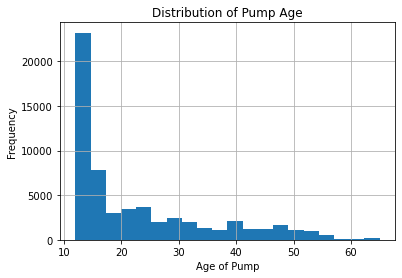

In [61]:
tanzania_data['pump_age'].hist(bins=20)
plt.title('Distribution of Pump Age')
plt.xlabel('Age of Pump')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='pump_age'>

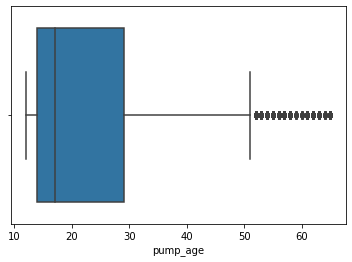

In [62]:
sns.boxplot(x=tanzania_data['pump_age'])

In [63]:
common_age = tanzania_data['pump_age'].mode()[0]
common_age

14

In [64]:
tanzania_data["pump_age"].unique()

array([26, 15, 16, 39, 14, 13, 38, 34, 47, 33, 17, 12, 51, 25, 23, 21, 53,
       22, 45, 18, 52, 40, 55, 30, 19, 63, 20, 28, 29, 48, 42, 41, 35, 43,
       49, 37, 36, 50, 65, 64, 27, 62, 54, 31, 57, 32, 24, 46, 58, 56, 44,
       61, 59, 60], dtype=int64)

The pumps in the dataset range from 12 to 65 years old, with 14 years being the most common age. This distribution provides insights into the aging infrastructure and potential maintenance needs. Understanding pump age helps assess functionality trends and predict failure risks over time. 

### Checking  wether public  meetings were held?

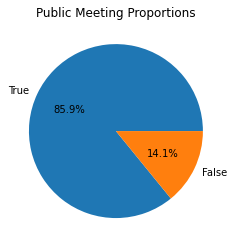

In [65]:
tanzania_data['public_meeting'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Public Meeting Proportions')
plt.ylabel('')
plt.show()

Public meetings were held to discuss pump management, with 85.9% attendance. However, 14.1% of region lacked participation, which may affect maintenance and sustainabilit

### Checking wether permits were handed out?

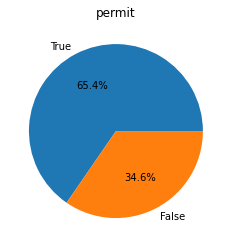

In [66]:
#checking wether they were attending the public meetings.
tanzania_data['permit'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('permit')
plt.ylabel('')
plt.show()

Permits were issued for 65.4% of wells, ensuring regulated installation and oversight. However, 34.6% operated without permits, which could impact compliance, maintenance, and long-term functionality. 

### Checking the water quality?

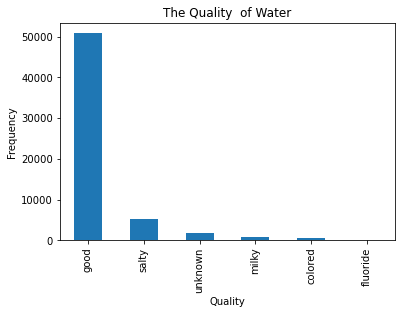

In [67]:
tanzania_data['quality_group'].value_counts().plot(kind='bar')
plt.title('The Quality  of Water')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

Most wells had good water quality, ensuring safe usage. However, a few showed signs of slight salinity or milky appearance, which could affect usability and treatment needs

### Which scheme  management runs  most of  the pumps?

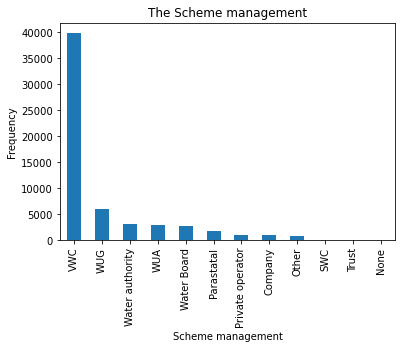

In [68]:
tanzania_data['scheme_management'].value_counts().plot(kind='bar')
plt.title('The Scheme management')
plt.xlabel('Scheme management')
plt.ylabel('Frequency')
plt.show()

Most water wells were managed by WWC scheme management, followed by WUG in second place, the water authority in third, the water board in fourth, and parastatals in fifth.

### Status of most  of the  water pumps

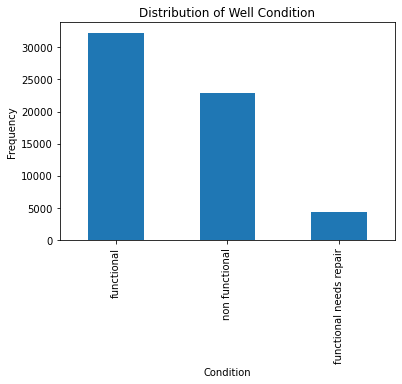

In [69]:
tanzania_data['status_group'].value_counts().plot(kind='bar')
plt.title('Distribution of Well Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.show()

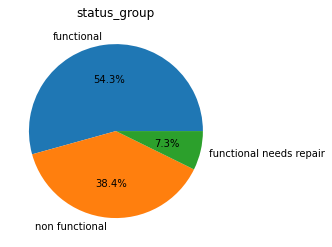

In [70]:
tanzania_data['status_group'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('status_group')
plt.ylabel('')
plt.show()

The majority of wells (**54.4%**) were **fully functional**, providing reliable water access. **7.3%** were **functional but needed repairs**, indicating potential maintenance issues. Meanwhile, **38.4%** were **non-functional**, highlighting significant challenges in water accessibility and infrastructure upkeep. 

### Which extraction type are most of the wells running on?

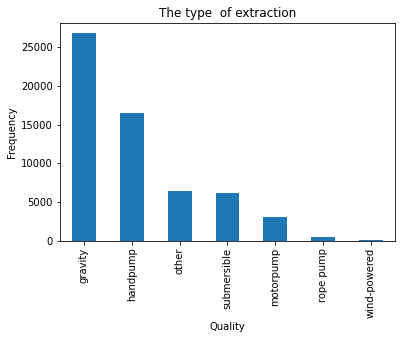

In [71]:
tanzania_data['extraction_type_class'].value_counts().plot(kind='bar')
plt.title('The type  of extraction')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

Most wells use **gravity extraction**, allowing water to flow naturally without mechanical assistance. Other common methods include **hand pumps**, **submersible pumps**, and **rope pumps**, each varying in efficiency and suitability based on location and infrastructure.

### Which management group runs most wells?

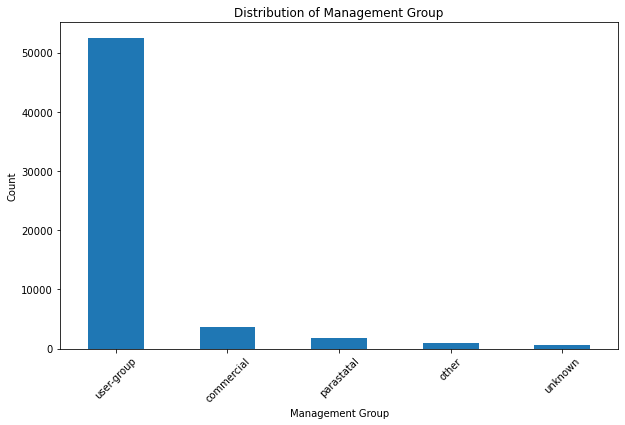

In [72]:
tanzania_data['management_group'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Management Group')
plt.xlabel('Management Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Most of the management groups were user-managed, followed by commercial management, and then parastatals

###  Ammount that the users pay.

In [73]:
np.set_printoptions(suppress=True)  # Disable scientific notation

unique_values = tanzania_data["amount_tsh"].unique()
print(unique_values)

[  6000.        0.       25.       20.      200.      500.       50.
   4000.     1500.        6.      250.       10.     1000.      100.
     30.     2000.      400.     1200.       40.      300.    25000.
    750.     5000.      600.     7200.     2400.        5.     3600.
    450.    40000.    12000.     3000.        7.    20000.     2800.
   2200.       70.     5500.    10000.     2500.     6500.      550.
     33.     8000.     4700.     7000.    14000.     1300.   100000.
    700.        1.       60.      350.        0.2      35.      306.
   8500.   117000.     3500.      520.       15.     6300.     9000.
    150.   120000.   138000.   350000.     4500.    13000.    45000.
      2.    15000.    11000.    50000.     7500.    16300.      800.
  16000.    30000.       53.     5400.    70000.   250000.   200000.
  26000.    18000.       26.      590.      900.        9.     1400.
 170000.      220.    38000.        0.25     12.    60000.       59.  ]


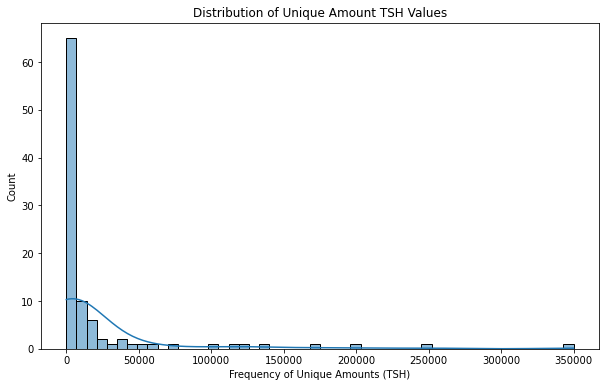

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(unique_values, bins=50, kde=True)

plt.xlabel("Frequency of Unique Amounts (TSH)")
plt.ylabel("Count")
plt.title("Distribution of Unique Amount TSH Values")

plt.show()

Most users access the wells for free, but some pay between **50,000 TSH and 350,000 TSH** for water usage.

### distribution of the gps height 

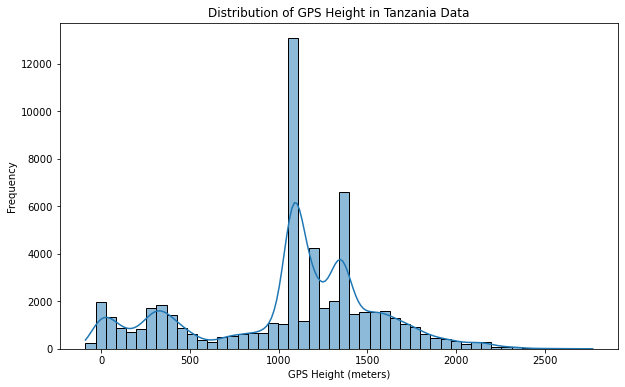

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(tanzania_data["gps_height"], bins=50, kde=True)
plt.xlabel("GPS Height (meters)")
plt.ylabel("Frequency")
plt.title("Distribution of GPS Height in Tanzania Data")
plt.show()

### how did most users pay?

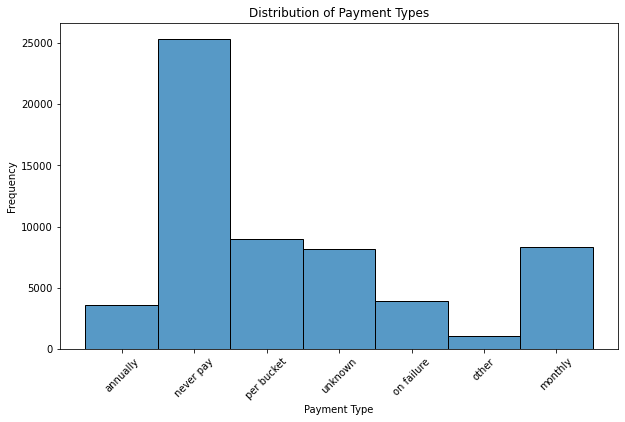

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(tanzania_data["payment_type"], bins=len(tanzania_data["payment_type"].unique()), kde=False)

plt.xlabel("Payment Type")
plt.ylabel("Frequency")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=45) 
plt.show()

Most wells operate without a payment system, providing free access to water. However, some communities use pay-per-bucket models, while others opt for monthly or annual payments to support maintenance and sustainability.

### who are the  top 10 funders?

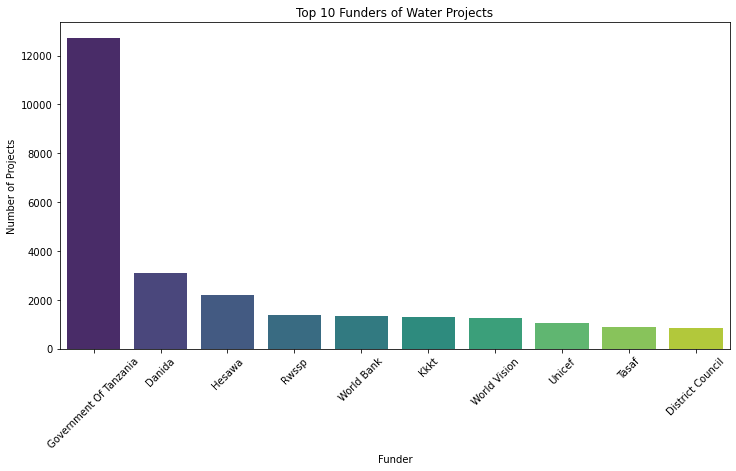

In [77]:
top_funders = tanzania_data["funder"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_funders.index, y=top_funders.values, palette="viridis")
plt.xlabel("Funder")
plt.ylabel("Number of Projects")
plt.title("Top 10 Funders of Water Projects")
plt.xticks(rotation=45)
plt.show()

The Government of Tanzania is the leading funder of water wells, playing a major role in infrastructure development. Other key contributors include DANIDA, HESAWA, RWSSP, World Bank, KKT, World Vision, UNICEF, TASAF, and District Councils, highlighting the involvement of both international and local organizations in improving water access. 

### top 10 installers

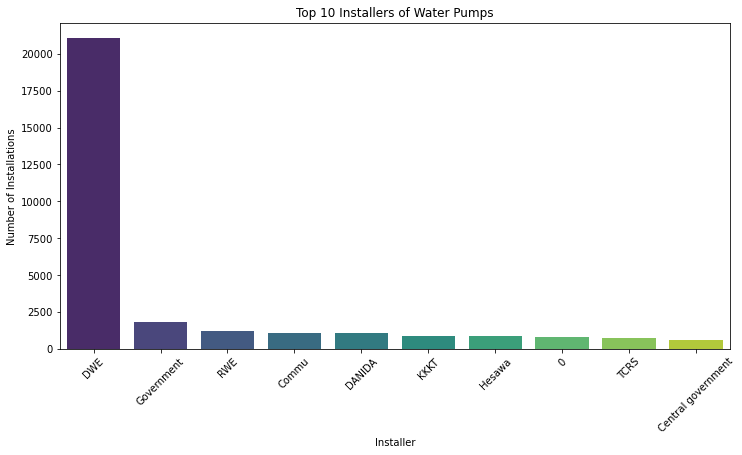

In [78]:
top_installers = tanzania_data["installer"].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_installers.index, y=top_installers.values, palette="viridis")
plt.xlabel("Installer")
plt.ylabel("Number of Installations")
plt.title("Top 10 Installers of Water Pumps")
plt.xticks(rotation=45)
plt.show()


The majority of wells were installed by **DWE (District Water Engineers)**, followed by the **Government of Tanzania**. Other key installers include **RWE (Regional Water Engineers)** and local **community-led initiatives**, reflecting a mix of institutional and grassroots efforts in water infrastructure development.

### how much is the quantity of  water coming from  the wells

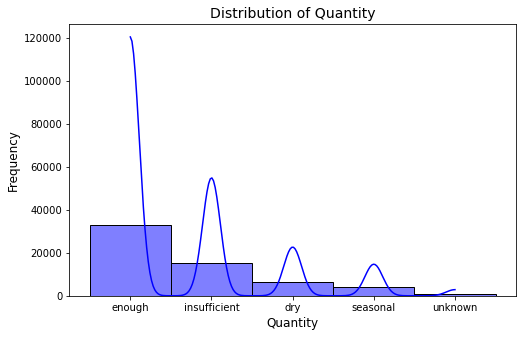

In [79]:
plt.figure(figsize=(8, 5))
sns.histplot(tanzania_data["quantity_group"], bins=10, kde=True, color="blue")
plt.xlabel("Quantity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Quantity", fontsize=14)
plt.show()

Most wells provided **enough water** to meet community needs, while some were classified as **sufficient** but not abundant. A few wells were **dry**, others had **seasonal water availability**, and some had **unknown water quantity**, indicating gaps in data or inconsistent supply. 

###  what is the source class of the water  from the  well??

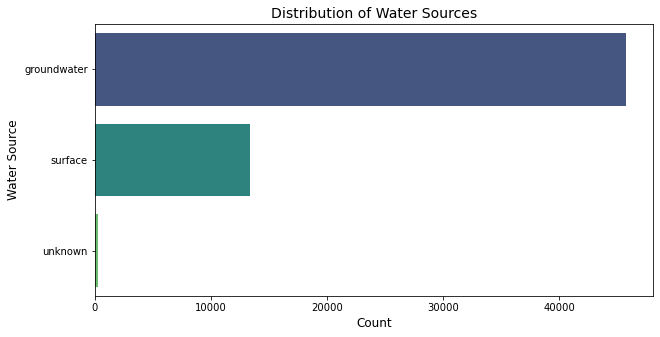

In [80]:
plt.figure(figsize=(10, 5))
sns.countplot(y=tanzania_data["source_class"], order=tanzania_data["source_class"].value_counts().index, palette="viridis")
plt.xlabel("Count", fontsize=12)
plt.ylabel("Water Source", fontsize=12)
plt.title("Distribution of Water Sources", fontsize=14)
plt.show()

Most of the water sources are from groundwater, while a smaller portion comes from surface water sources.

## bivariate analysis

### checking the population distribution per region

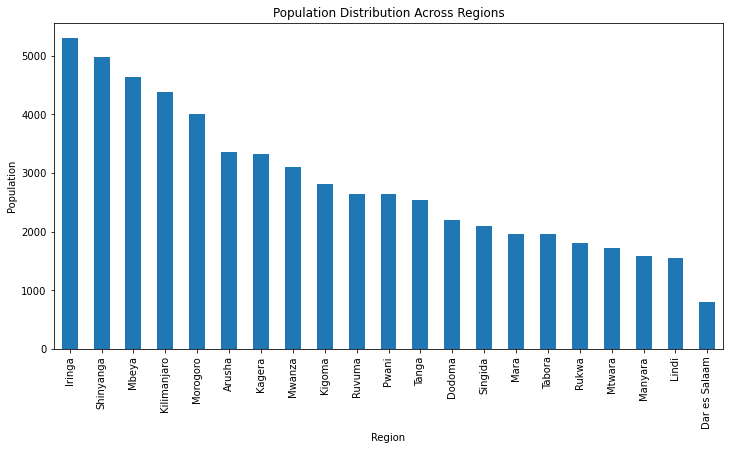

In [81]:
tanzania_data['region'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Population Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Population')
plt.show()

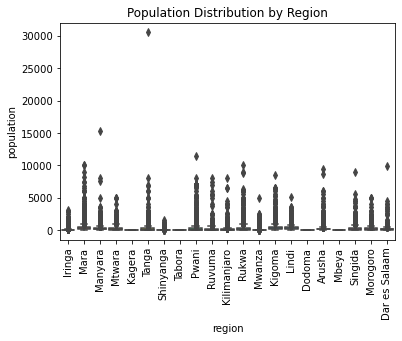

In [82]:
sns.boxplot(x='region', y='population', data=tanzania_data)
plt.xticks(rotation=90)
plt.title('Population Distribution by Region')
plt.show()

The regions with the highest populations include **Iringa, Shinyanga, Mbeya, Kilimanjaro, Morogoro, Arusha, Kagera, Mwanza, Kigoma, Ruvuma, and Pwani**. These areas have a higher demand for water, making well functionality and maintenance critical for community sustainability.

### comparing the scheme management vs the status of the pumps

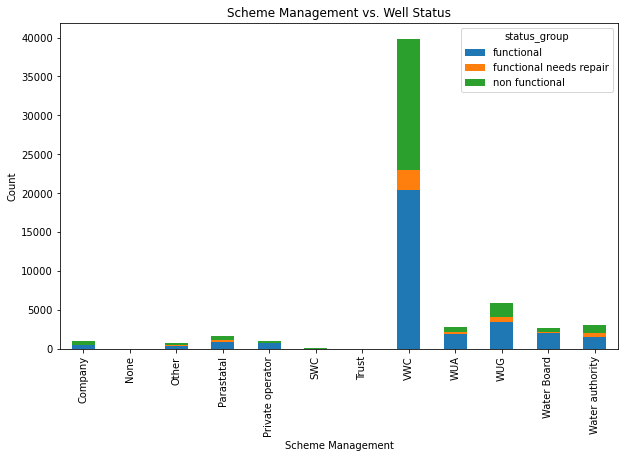

In [83]:
tanzania_data.groupby(['scheme_management', 'status_group']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Scheme Management vs. Well Status')
plt.ylabel('Count')
plt.xlabel('Scheme Management')
plt.show()

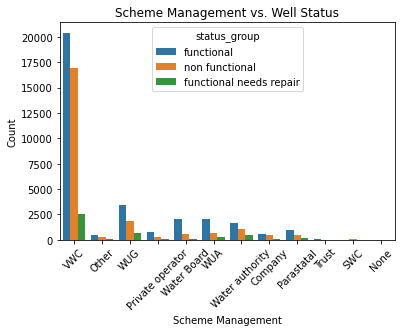

In [84]:
sns.countplot(x='scheme_management', hue='status_group', data=tanzania_data)
plt.title('Scheme Management vs. Well Status')
plt.xlabel('Scheme Management')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Wells under the **VMC scheme** had the highest number of **functional** wells, followed by **non-functional** ones, with only a few requiring **repairs**. This trend was similar across other schemes, indicating that while many wells remain operational, maintenance challenges persist. 🚰

### checking wether the scheme management were issued permits

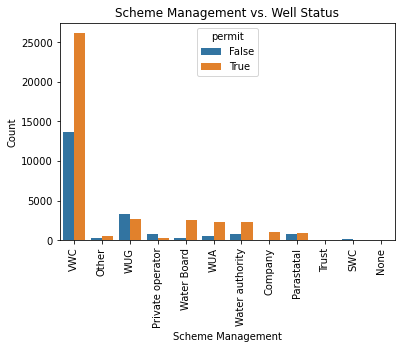

In [85]:
sns.countplot(x='scheme_management', hue='permit', data=tanzania_data)
plt.title('Scheme Management vs. Well Status')
plt.xlabel('Scheme Management')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

The **VMC scheme** had permits for most of its wells, ensuring regulatory compliance. However, a few wells operated **without permits**. This pattern was consistent across other schemes, highlighting both adherence to regulations and instances of unpermitted installations. 

### checking wether the management groups have permit 

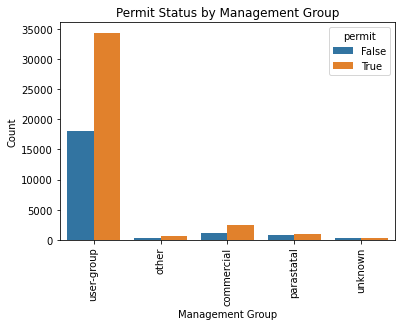

In [86]:
sns.countplot(x='management_group', hue='permit', data=tanzania_data)
plt.title('Permit Status by Management Group')
plt.xlabel('Management Group')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Wells managed by user groups had permits for most installations, though a few lacked them. Similarly, commercial and parastatal-managed wells followed the same trend, with most being permitted but some operating without official approval. 

### population by  management group

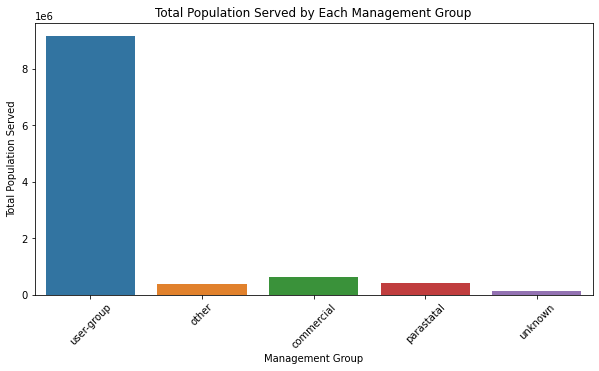

In [87]:
plt.figure(figsize=(10, 5))
sns.barplot(x="management_group", y="population", data=tanzania_data, estimator=sum, ci=None)
plt.xticks(rotation=45)
plt.ylabel("Total Population Served")
plt.xlabel("Management Group")
plt.title("Total Population Served by Each Management Group")
plt.show()

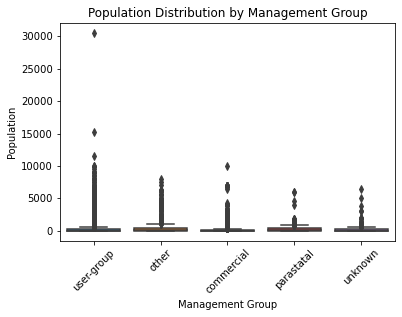

In [88]:
sns.boxplot(x='management_group', y='population', data=tanzania_data)
plt.title('Population Distribution by Management Group')
plt.xlabel('Management Group')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()

Most of the population relied on wells managed by user groups, ensuring community oversight. Others were managed by commercial entities and parastatals, playing a role in regulated water distribution and maintenance. 

### checking the trend across the age and  status group

<Figure size 864x432 with 0 Axes>

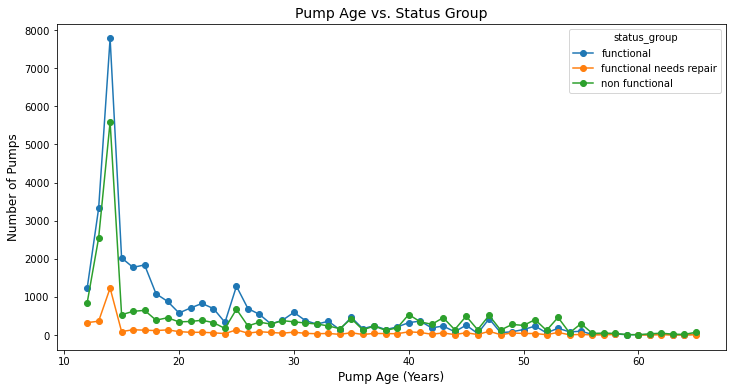

In [89]:
plt.figure(figsize=(12, 6))
tanzania_data.groupby(["pump_age", "status_group"]).size().unstack().plot(kind="line", marker="o", figsize=(12, 6))

plt.xlabel("Pump Age (Years)", fontsize=12)
plt.ylabel("Number of Pumps", fontsize=12)
plt.title("Pump Age vs. Status Group", fontsize=14)
plt.show()

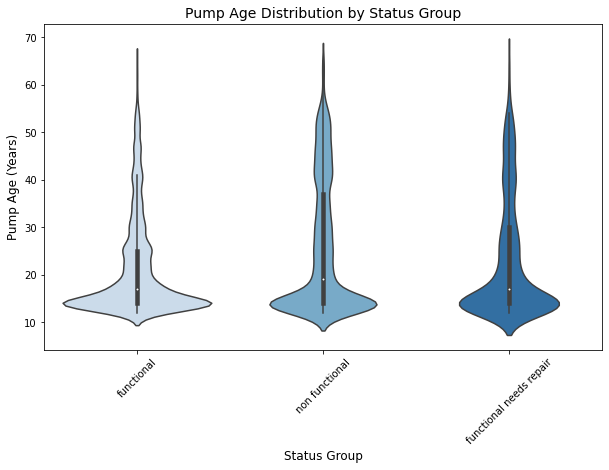

In [90]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="status_group", y="pump_age", data=tanzania_data, palette="Blues")

plt.xlabel("Status Group", fontsize=12)
plt.ylabel("Pump Age (Years)", fontsize=12)
plt.title("Pump Age Distribution by Status Group", fontsize=14)
plt.xticks(rotation=45)
plt.show()


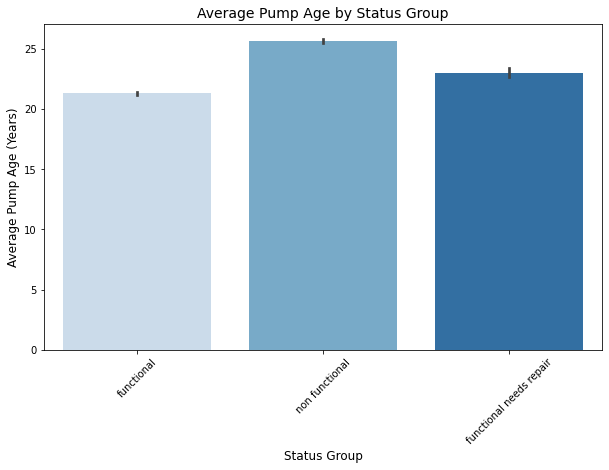

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status_group", y="pump_age", data=tanzania_data, estimator=lambda x: x.mean(), palette="Blues")

plt.xlabel("Status Group", fontsize=12)
plt.ylabel("Average Pump Age (Years)", fontsize=12)
plt.title("Average Pump Age by Status Group", fontsize=14)
plt.xticks(rotation=45)
plt.show()

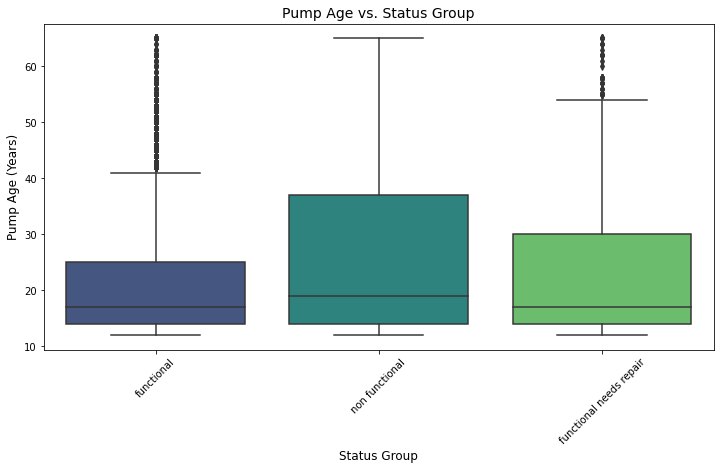

In [92]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="status_group", y="pump_age", data=tanzania_data, palette="viridis")

plt.xlabel("Status Group", fontsize=12)
plt.ylabel("Pump Age (Years)", fontsize=12)
plt.title("Pump Age vs. Status Group", fontsize=14)
plt.xticks(rotation=45)
plt.show()

Younger pumps are performing well, with fewer issues and consistent functionality. However, older pumps are more prone to failure, requiring frequent maintenance or replacement due to wear and aging infrastructure.

### checking well management vs functionality 

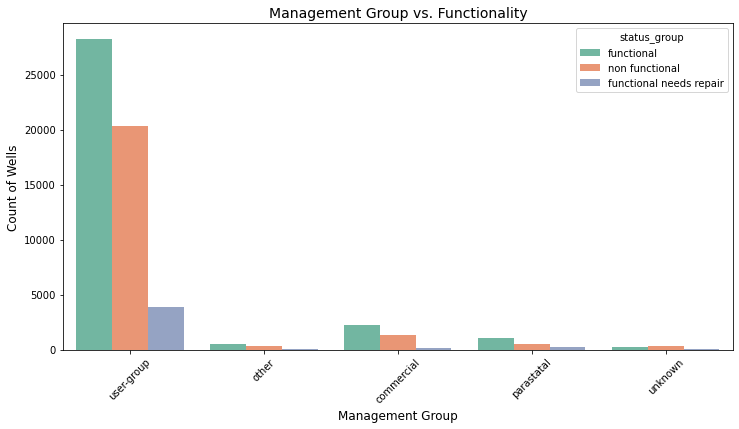

In [93]:
plt.figure(figsize=(12, 6))
sns.countplot(x="management_group", hue="status_group", data=tanzania_data, palette="Set2")

plt.xlabel("Management Group", fontsize=12)
plt.ylabel("Count of Wells", fontsize=12)
plt.title("Management Group vs. Functionality", fontsize=14)
plt.xticks(rotation=45)
plt.show()


Most wells, whether user group, commercial, or parastatal-managed, were functional, though some failed, and a few required repairs, following a consistent trend across all management types.

### population by management group

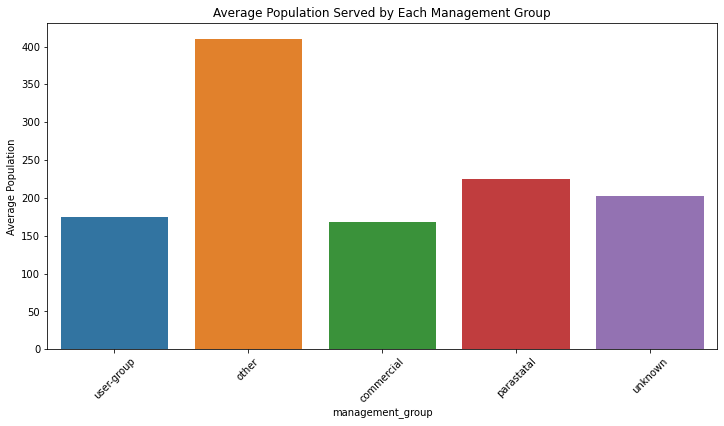

In [94]:
plt.figure(figsize=(12,6))
sns.barplot(x="management_group", y="population", data=tanzania_data, estimator=lambda x: x.mean(), ci=None)
plt.xticks(rotation=45)
plt.ylabel("Average Population")
plt.title("Average Population Served by Each Management Group")
plt.show()


## Multivariate analysis

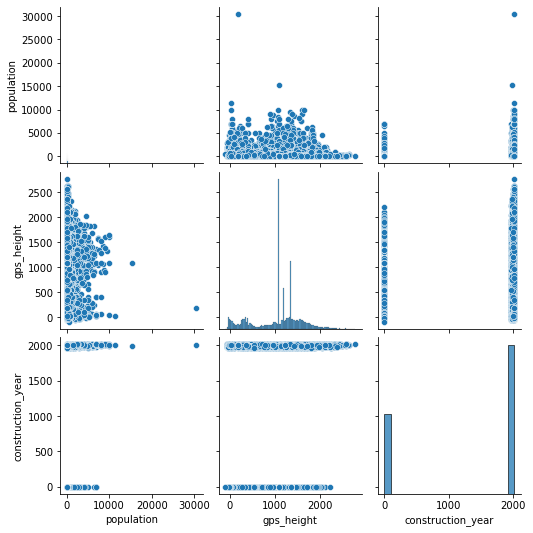

In [95]:
sns.pairplot(tanzania_data[['population', 'gps_height', 'construction_year']])
plt.show()

In [96]:
tanzania_data.corr()

,amount_tsh,date_recorded,gps_height,num_private,region_code,population,public_meeting,permit,construction_year,pump_age
amount_tsh,1.000000,-0.004743,0.023743,0.002944,-0.026813,0.016288,0.025683,0.025042,0.067915,0.033813
date_recorded,-0.004743,1.000000,0.081006,-0.013816,0.165532,0.131747,-0.111386,-0.003344,0.354792,0.174573
gps_height,0.023743,0.081006,1.000000,-0.018274,-0.293706,-0.100316,0.028689,-0.000484,-0.132223,-0.070436
num_private,0.002944,-0.013816,-0.018274,1.000000,-0.020377,0.003818,0.011230,0.011962,0.026056,0.017523
region_code,-0.026813,0.165532,-0.293706,-0.020377,1.000000,0.094088,-0.044806,-0.010835,0.031724,0.024029
population,0.016288,0.131747,-0.100316,0.003818,0.094088,1.000000,-0.000398,-0.034684,0.260910,0.122728
public_meeting,0.025683,-0.111386,0.028689,0.011230,-0.044806,-0.000398,1.000000,0.140349,0.007490,0.004557
permit,0.025042,-0.003344,-0.000484,0.011962,-0.010835,-0.034684,0.140349,1.000000,0.078793,0.072490
construction_year,0.067915,0.354792,-0.132223,0.026056,0.031724,0.260910,0.007490,0.078793,1.000000,0.560657
pump_age,0.033813,0.174573,-0.070436,0.017523,0.024029,0.122728,0.004557,0.072490,0.560657,1.000000


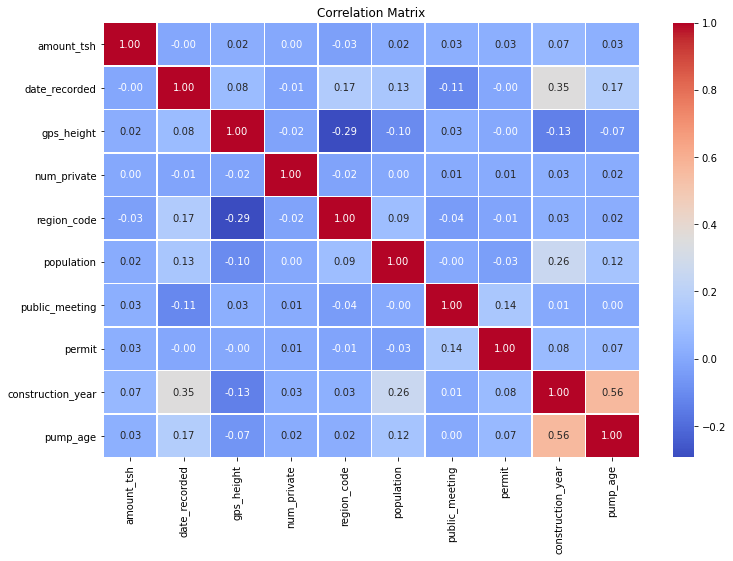

In [97]:
correlation_matrix = tanzania_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Chi-square

In [98]:
contingency_table = pd.crosstab(tanzania_data["management_group"], tanzania_data["status_group"])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("There is a significant relationship between management group and status group.")
else:
    print("No significant relationship found.")


Chi-Square Value: 287.65157783580787
P-Value: 1.744626138526002e-57
There is a significant relationship between management group and status group.


This means that the **management group** (user group, commercial, parastatal, etc.) has a **significant impact** on the **functionality status** of the wells (**functional, non-functional, or needs repair**).  

Since the **Chi-square value is high** (287.65) and the **p-value is extremely low** (1.74e-57, much smaller than 0.05), we reject the null hypothesis, confirming that **well management is strongly associated with whether a well is functional or not**. 

# Feature Selection.

In [99]:
tanzania_data

,amount_tsh,date_recorded,funder,gps_height,installer,num_private,basin,region,region_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,status_group,pump_age
0,6000.0,2011,Roman,1390.000000,Roman,0,Lake Nyasa,Iringa,11,109,True,VWC,False,1999,gravity,user-group,annually,good,enough,groundwater,functional,26
1,0.0,2013,Grumeti,1399.000000,GRUMETI,0,Lake Victoria,Mara,20,280,False,Other,True,2010,gravity,user-group,never pay,good,insufficient,surface,functional,15
2,25.0,2013,Lottery Club,686.000000,World vision,0,Pangani,Manyara,21,250,True,VWC,True,2009,gravity,user-group,per bucket,good,enough,surface,functional,16
3,0.0,2013,Unicef,263.000000,UNICEF,0,Ruvuma / Southern Coast,Mtwara,90,58,True,VWC,True,1986,submersible,user-group,never pay,good,dry,groundwater,non functional,39
4,0.0,2011,Action In A,1086.967394,Artisan,0,Lake Victoria,Kagera,18,0,True,VWC,True,0,gravity,other,never pay,good,seasonal,surface,functional,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,2013,Germany Republi,1210.000000,CES,0,Pangani,Kilimanjaro,3,125,True,Water Board,True,1999,gravity,user-group,per bucket,good,enough,groundwater,functional,26
59396,4700.0,2011,Cefa-njombe,1212.000000,Cefa,0,Rufiji,Iringa,11,56,True,VWC,True,1996,gravity,user-group,annually,good,enough,surface,functional,29
59397,0.0,2011,Government Of Tanzania,1086.967394,DWE,0,Rufiji,Mbeya,12,0,True,VWC,False,0,handpump,user-group,monthly,fluoride,enough,groundwater,functional,14
59398,0.0,2011,Malec,1086.967394,Musa,0,Rufiji,Dodoma,1,0,True,VWC,True,0,handpump,user-group,never pay,good,insufficient,groundwater,functional,14


## defining features and target 

In [100]:
X = tanzania_data.drop(columns=["date_recorded","scheme_management","status_group","funder","installer","num_private","region","basin"])
X

,amount_tsh,gps_height,region_code,population,public_meeting,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,pump_age
0,6000.0,1390.000000,11,109,True,False,1999,gravity,user-group,annually,good,enough,groundwater,26
1,0.0,1399.000000,20,280,False,True,2010,gravity,user-group,never pay,good,insufficient,surface,15
2,25.0,686.000000,21,250,True,True,2009,gravity,user-group,per bucket,good,enough,surface,16
3,0.0,263.000000,90,58,True,True,1986,submersible,user-group,never pay,good,dry,groundwater,39
4,0.0,1086.967394,18,0,True,True,0,gravity,other,never pay,good,seasonal,surface,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210.000000,3,125,True,True,1999,gravity,user-group,per bucket,good,enough,groundwater,26
59396,4700.0,1212.000000,11,56,True,True,1996,gravity,user-group,annually,good,enough,surface,29
59397,0.0,1086.967394,12,0,True,False,0,handpump,user-group,monthly,fluoride,enough,groundwater,14
59398,0.0,1086.967394,1,0,True,True,0,handpump,user-group,never pay,good,insufficient,groundwater,14


In [101]:
y = tanzania_data["status_group"]
y

0            functional
1            functional
2            functional
3        non functional
4            functional
              ...      
59395        functional
59396        functional
59397        functional
59398        functional
59399        functional
Name: status_group, Length: 59400, dtype: object

## Encoding  categorical values 

In [102]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)  

In [103]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Encoding Mapping:", label_mapping)

Label Encoding Mapping: {'functional': 0, 'functional needs repair': 1, 'non functional': 2}


In [104]:
y_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [105]:
encoder = LabelEncoder()

X["permit"] = encoder.fit_transform(X["permit"])
X["public_meeting"] = encoder.fit_transform(X["public_meeting"])

In [106]:
X

,amount_tsh,gps_height,region_code,population,public_meeting,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,pump_age
0,6000.0,1390.000000,11,109,1,0,1999,gravity,user-group,annually,good,enough,groundwater,26
1,0.0,1399.000000,20,280,0,1,2010,gravity,user-group,never pay,good,insufficient,surface,15
2,25.0,686.000000,21,250,1,1,2009,gravity,user-group,per bucket,good,enough,surface,16
3,0.0,263.000000,90,58,1,1,1986,submersible,user-group,never pay,good,dry,groundwater,39
4,0.0,1086.967394,18,0,1,1,0,gravity,other,never pay,good,seasonal,surface,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210.000000,3,125,1,1,1999,gravity,user-group,per bucket,good,enough,groundwater,26
59396,4700.0,1212.000000,11,56,1,1,1996,gravity,user-group,annually,good,enough,surface,29
59397,0.0,1086.967394,12,0,1,0,0,handpump,user-group,monthly,fluoride,enough,groundwater,14
59398,0.0,1086.967394,1,0,1,1,0,handpump,user-group,never pay,good,insufficient,groundwater,14


In [107]:
X["quality_group"] = le.fit_transform(X["quality_group"])
X["quantity_group"] = le.fit_transform(X["quantity_group"])
X["management_group"] = le.fit_transform(X["management_group"])
X["payment_type"] = le.fit_transform(X["payment_type"])
X["quality_group"] = le.fit_transform(X["quality_group"])
X["extraction_type_class"] = le.fit_transform(X["extraction_type_class"])
X["source_class"] = le.fit_transform(X["source_class"])

## Scaling the numeric features.

In [108]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [109]:
X_scaled

array([[ 1.89566509,  0.64748514, -0.2443248 , ..., -0.40530054,
        -0.53841035,  0.2382332 ],
       [-0.10597003,  0.66509518,  0.26740931, ...,  0.83887787,
         1.76507387, -0.65937589],
       [-0.09762988, -0.7300112 ,  0.32426866, ..., -0.40530054,
         1.76507387, -0.57777506],
       ...,
       [-0.10597003,  0.05455005, -0.18746545, ..., -0.40530054,
        -0.53841035, -0.74097672],
       [-0.10597003,  0.05455005, -0.81291826, ...,  0.83887787,
        -0.53841035, -0.74097672],
       [-0.10597003, -1.69856331, -0.58548087, ..., -0.40530054,
        -0.53841035, -0.00656928]])

## Stratified sampling 

In [110]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, stratify=y, random_state=42)

## Class imbalance

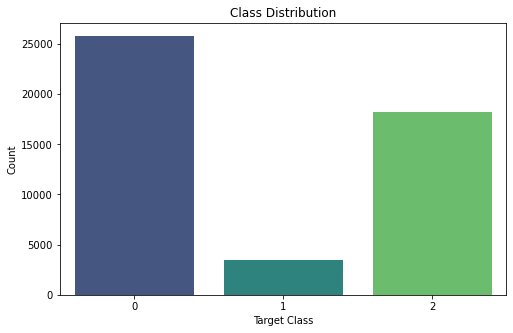

In [111]:
plt.figure(figsize=(8,5))
sns.countplot(x=y_train, palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()

In [112]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [113]:
y_train = pd.Series(y_train)
y_train_res = pd.Series(y_train_res)

In [114]:
print("Original class distribution:")
print(y_train.value_counts())

print("Resampled class distribution:")
print(y_train_res.value_counts())


Original class distribution:
0    25807
2    18259
1     3454
dtype: int64
Resampled class distribution:
2    25807
1    25807
0    25807
dtype: int64


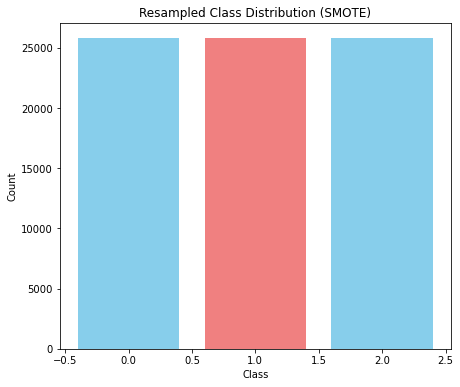

In [115]:
plt.figure(figsize=(7, 6))
plt.bar(y_train_res.value_counts().index, y_train_res.value_counts().values, color=['skyblue', 'lightcoral'])
plt.title('Resampled Class Distribution (SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Modelling & Evaluation.

## Baseline logistic model

In [116]:
baseline_lr = LogisticRegression(max_iter=1000, random_state=42)

baseline_lr.fit(X_train, y_train)

y_pred_baseline = baseline_lr.predict(X_test)

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Logistic Regression Accuracy: {baseline_accuracy:.4f}")

Baseline Logistic Regression Accuracy: 0.6401


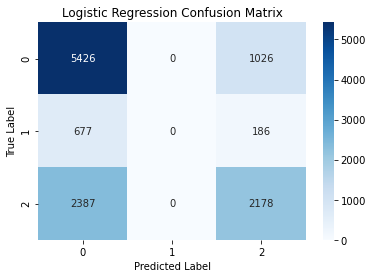

In [117]:
cm = confusion_matrix(y_test, y_pred_baseline)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=baseline_lr.classes_, yticklabels=baseline_lr.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [118]:
report = classification_report(y_test, y_pred_baseline, zero_division=1)

print(report)

              precision    recall  f1-score   support

           0       0.64      0.84      0.73      6452
           1       1.00      0.00      0.00       863
           2       0.64      0.48      0.55      4565

    accuracy                           0.64     11880
   macro avg       0.76      0.44      0.42     11880
weighted avg       0.67      0.64      0.60     11880



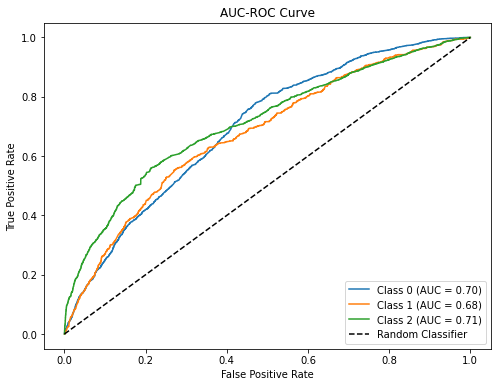

In [119]:
y_test_binarized = label_binarize(y_test, classes=baseline_lr.classes_)

y_score = baseline_lr.predict_proba(X_test)

plt.figure(figsize=(8, 6))

for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {baseline_lr.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")
plt.legend(loc="lower right")
plt.show()


## Desicion tree. 

In [120]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

Decision Tree Accuracy: 0.7364


In [121]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(cm_dt)


Confusion Matrix:
[[5282  296  874]
 [ 470  227  166]
 [1182  143 3240]]


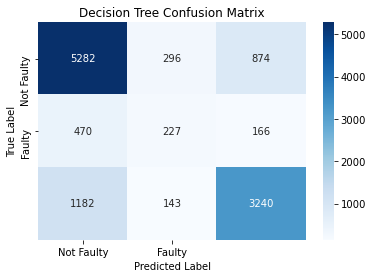

In [122]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Faulty", "Faulty"], yticklabels=["Not Faulty", "Faulty"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [123]:
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      6452
           1       0.34      0.26      0.30       863
           2       0.76      0.71      0.73      4565

    accuracy                           0.74     11880
   macro avg       0.62      0.60      0.61     11880
weighted avg       0.73      0.74      0.73     11880



In [124]:
dt_gini = DecisionTreeClassifier(criterion="gini", random_state=42)

dt_gini.fit(X_train, y_train)

y_pred_gini = dt_gini.predict(X_test)

gini_accuracy = accuracy_score(y_test, y_pred_gini)
print(f"Decision Tree (Gini) Accuracy: {gini_accuracy:.4f}")

Decision Tree (Gini) Accuracy: 0.7364


In [125]:
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_leaf=5, random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")


Decision Tree Accuracy: 0.7392


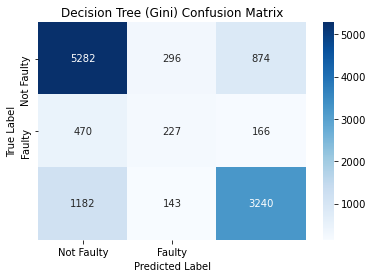

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      6452
           1       0.34      0.26      0.30       863
           2       0.76      0.71      0.73      4565

    accuracy                           0.74     11880
   macro avg       0.62      0.60      0.61     11880
weighted avg       0.73      0.74      0.73     11880



In [126]:
y_pred_gini = dt_gini.predict(X_test)

cm_gini = confusion_matrix(y_test, y_pred_gini)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gini, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Faulty", "Faulty"], yticklabels=["Not Faulty", "Faulty"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree (Gini) Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_gini))


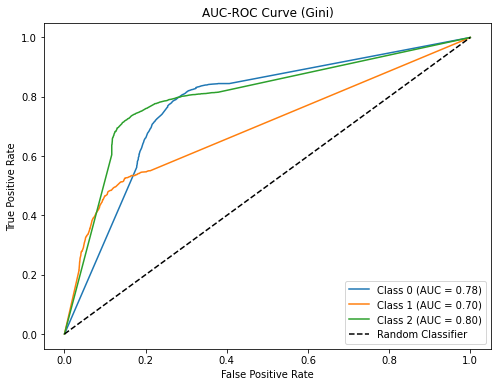

In [127]:
y_test_binarized = label_binarize(y_test, classes=dt_gini.classes_)

y_score = dt_gini.predict_proba(X_test)

plt.figure(figsize=(8, 6))

for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {dt_gini.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve (Gini)")
plt.legend(loc="lower right")
plt.show()


In [128]:
dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)

dt_entropy.fit(X_train, y_train)

y_pred_entropy = dt_entropy.predict(X_test)

entropy_accuracy = accuracy_score(y_test, y_pred_entropy)
print(f"Decision Tree (Entropy) Accuracy: {entropy_accuracy:.4f}")


Decision Tree (Entropy) Accuracy: 0.7391


In [129]:
dt_model_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_leaf=5, random_state=42)
dt_model_entropy.fit(X_train, y_train)

y_pred_entropy = dt_model_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Decision Tree (Entropy) Accuracy: {accuracy_entropy:.4f}")


Decision Tree (Entropy) Accuracy: 0.7427


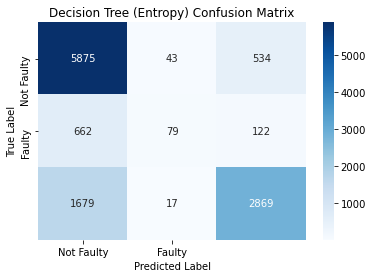

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.91      0.80      6452
           1       0.57      0.09      0.16       863
           2       0.81      0.63      0.71      4565

    accuracy                           0.74     11880
   macro avg       0.70      0.54      0.56     11880
weighted avg       0.74      0.74      0.72     11880



In [130]:
y_pred_entropy = dt_model_entropy.predict(X_test)

cm_entropy = confusion_matrix(y_test, y_pred_entropy)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_entropy, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Faulty", "Faulty"], yticklabels=["Not Faulty", "Faulty"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree (Entropy) Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_entropy))


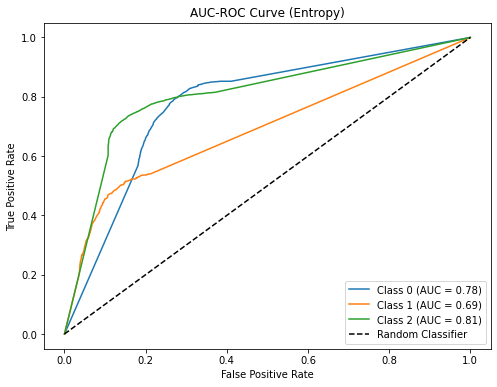

In [131]:
y_test_binarized = label_binarize(y_test, classes=dt_entropy.classes_)
y_score_entropy = dt_entropy.predict_proba(X_test)

plt.figure(figsize=(8, 6))

for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score_entropy[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {dt_entropy.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve (Entropy)")
plt.legend(loc="lower right")
plt.show()


### Hyperparameter tuning

In [132]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3, 20),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 10)
}

dt = DecisionTreeClassifier(random_state=42)

random_search = RandomizedSearchCV(dt, param_distributions=param_dist, 
                                   n_iter=50, scoring='accuracy', 
                                   cv=5, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Parameters: {'min_samples_split': 4, 'min_samples_leaf': 5, 'max_depth': 13, 'criterion': 'entropy'}
Best Score: 0.75128367003367


In [133]:
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.7552188552188552

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81      6452
           1       0.47      0.17      0.25       863
           2       0.81      0.67      0.74      4565

    accuracy                           0.76     11880
   macro avg       0.68      0.58      0.60     11880
weighted avg       0.75      0.76      0.74     11880



In [134]:
conf_matrix = confusion_matrix(y_test, y_pred)

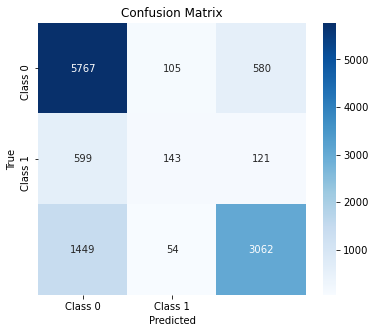

In [135]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Random forest

In [136]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test) 

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train_resampled, y_train_resampled)

y_pred = rf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.7387205387205387

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.79      6452
           1       0.28      0.51      0.36       863
           2       0.81      0.75      0.78      4565

    accuracy                           0.74     11880
   macro avg       0.63      0.67      0.64     11880
weighted avg       0.77      0.74      0.75     11880



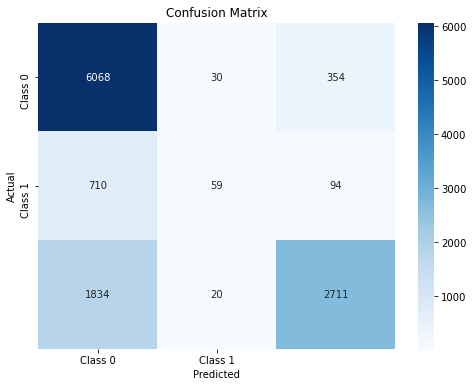

In [137]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


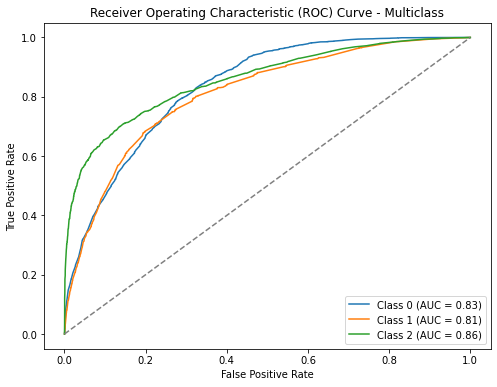

In [138]:
n_classes = len(set(y_test))
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_prob = rf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


### Hyper parameter tuning

## Gradient boosting 

In [139]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_resampled, y_train_resampled)

y_pred = gb.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.6556397306397307

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.68      0.72      6452
           1       0.20      0.56      0.29       863
           2       0.78      0.64      0.71      4565

    accuracy                           0.66     11880
   macro avg       0.58      0.63      0.57     11880
weighted avg       0.73      0.66      0.68     11880



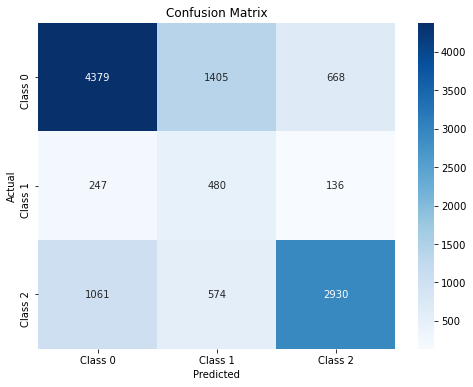

In [140]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


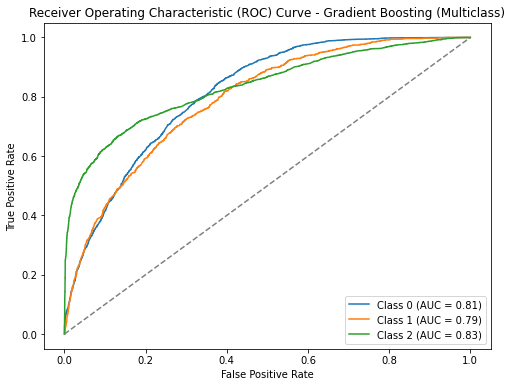

In [141]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_prob = gb.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(set(y_test))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


### Early stopping

In [142]:
gb = GradientBoostingClassifier(n_estimators=1000, 
                                learning_rate=0.1, 
                                random_state=42, 
                                warm_start=True, 
                                validation_fraction=0.1,  
                                n_iter_no_change=10)  

gb.fit(X_train_resampled, y_train_resampled)

y_pred = gb.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.7073232323232324

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76      6452
           1       0.26      0.52      0.35       863
           2       0.80      0.68      0.73      4565

    accuracy                           0.71     11880
   macro avg       0.61      0.65      0.61     11880
weighted avg       0.75      0.71      0.72     11880



### cross - validation

In [144]:
from sklearn.model_selection import cross_val_score

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

cv_scores = cross_val_score(gb, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean()}')
print(f'Standard Deviation of CV scores: {cv_scores.std()}')


Cross-validation scores: [0.65243784 0.6914234  0.69265048 0.70065874 0.69161715]
Mean CV score: 0.6857575246984878
Standard Deviation of CV scores: 0.017007044322297608


In [145]:
gb.fit(X_train_resampled, y_train_resampled)


y_pred = gb.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Set Accuracy: {test_accuracy}')


Test Set Accuracy: 0.3293771043771044


### Light GBM

In [143]:
import lightgbm as lgb

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

lgbm = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgbm.fit(X_train_res, y_train_res)

y_pred = lgbm.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2850
[LightGBM] [Info] Number of data points in the train set: 77421, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Test Accuracy: 0.27154882154882154

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.01      0.02      6452
           1       0.10      0.91      0.18       863
           2       0.61      0.52      0.56      4565

    accuracy                           0.27     11880
   macro avg       0.56      0.48      0.25     11880
weighted avg       0.76      0.27      0.24     11880

